# Bike Rental Density Predictions
In this project, we are going to create a model to predict bike rental density related to the hour of the day in Washington DC. The outcome of the result will be useful for the company to optimize bike circulation.

Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

__cnt__ is our target column in this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
br = pd.read_csv("bike_rental_hour.csv")

In [3]:
br.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


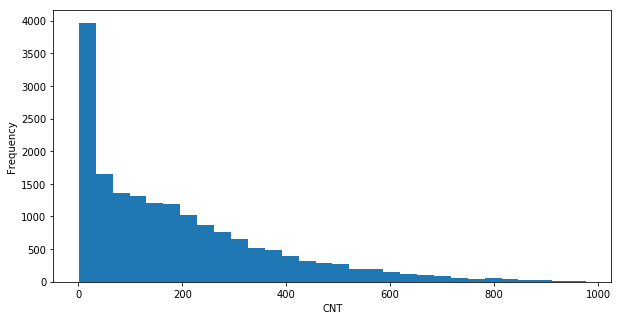

In [5]:
plt.figure(figsize=(10,5))
plt.hist(br.cnt, bins=30)
plt.ylabel("Frequency")
plt.xlabel("CNT")
plt.show()

This histogram says that, most of the time, low amount of bikes are rented. As the number of bikes rented increases, number of finding such an hour gets more difficult.

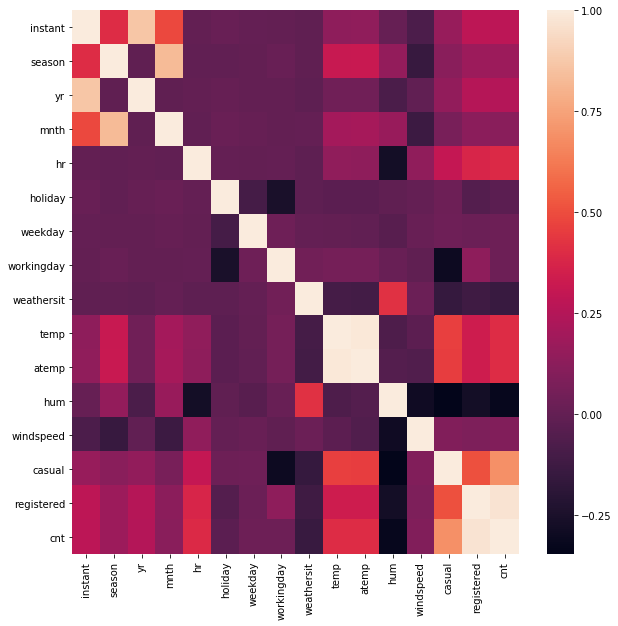

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(br.corr())
plt.show()

This heatmap says very interesting things. Some of the derivations of this chart could be:

- Rented bikes are closely related with registered number of bikers and somewhat correlated with casual bikers.
- As the weather conditions get worse, like temperature (or adjusted temp) or humidity or windspeed increase, bike rentals decreases.

## FEATURE ENGINEERING

First thing to be done could be arranging ___hr___ column, which gives the hour of the rent. We would better group the information like "morning", "afternoon", "evening" and "night" to have better results.

In [7]:
def assign_label(num):
    if 6<=num<12:
        return 1
    elif 12<=num<18:
        return 2
    elif 18<=num<=24:
        return 3
    else:
        return 4

br["time_label"] = br.hr.apply(assign_label)

## Model Creation

We are going to use LinearRegression and Random Forest models to predict number of rents at a particular hour of the day. In order to evaluate the model accuracy, we will use MSE metric which fits continuous data well.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

predictors = list(br.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

In [9]:
X = br[predictors]
y = br.cnt

In [10]:
mse_list = []
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    predictions = reg.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)
linear_mse = np.mean(mse_list)
print(linear_mse)

17527.515593767283


In [11]:
# Let us use RandomForest instead and see the improvement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
reg = RandomForestRegressor(n_estimators = 300, min_samples_leaf= 3)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
RF_mse = mean_squared_error(y_test, predictions)
print(RF_mse)

1765.3403580273032


In [14]:
y.mean()**2

35896.26157599877

After some jitter with the parameters, 1/10th of the error of a linear regression model has been acquired using Random Forest.